#[문제 1] 
####다변수 함수에 대한 수치미분 최종 코드 (예제 2 코드)는 입력되는 변수 x 에 대해서 vector 또는 matrix 형태를 파악한 후에, 두개의 for 문을 이용하여 구현되어 있는 것을 알 수 있는데, 두개의 for문을 사용하지 말고 파이썬의 이터레이터(iterator)를 이용하여 수치미분 코드를 다시 작성하시오 (즉 입력되는 변수 x 에 대해서 vector 또는 matrix 형태를 파악하지 않는 형태이며 각각의 원소에는 이터레이터를 이용하여 참조할 수 있어야 함)

In [1]:
import numpy as np
def numerical_derivative(f, x): # 수치미분 이터레이터 version
    delta_x = 1e-4
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])

    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        x[idx] = float(tmp_val) - delta_x
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        x[idx] = tmp_val
        it.iternext()
    return grad

#[문제 2] 
####다음과 같은 결과가 나오도록 이터레이터로 구현된 수치미분 코드를 변경하시오. 즉 debug 문장을 추가하여미분 되는 과정과 결과값에 대해 디버깅을 수월하게 할 수 있는 가독성 높은 코드를 작성하시오

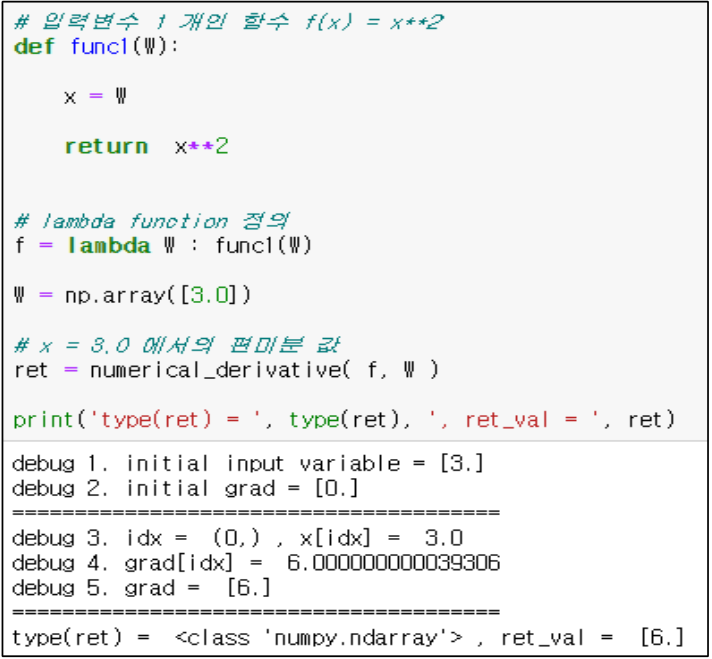

In [2]:
import numpy as np

def numerical_derivative(f, x): # 수치미분 debug version
		delta_x = 1e-4
		grad = np.zeros_like(x)
		print("debug 1. initial input variable =", x)
		print("debug 2. initial grad =", grad)
		print("=======================================")

		it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])

		while not it.finished:
				idx = it.multi_index

				print("debug 3. idx = ", idx, ", x[idx] = ", x[idx])

				tmp_val = x[idx]
				x[idx] = float(tmp_val) + delta_x
				fx1 = f(x) # f(x+delta_x)

				x[idx] = float(tmp_val) - delta_x
				fx2 = f(x) # f(x-delta_x)
				grad[idx] = (fx1 - fx2) / (2*delta_x)

				print("debug 4. grad[idx] = ", grad[idx])
				print("debug 5. grad = ", grad)
				print("=======================================")

				x[idx] = tmp_val
				it.iternext()
		return grad

#[문제 3] 
####2변수 함수 $f(x,y) = 2x+3xy+y^3$ 에 대하여 $f'(1.0, 2.0)$ 계산하는 파이썬 코드를 구현 하시오 (이터레이터를 이용한 수치미분 코드를 이용하여 구현하시오)

In [3]:
import numpy as np

def numerical_derivative(f, x): # 수치미분 이터레이터 version
		delta_x = 1e-4
		grad = np.zeros_like(x)
		it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])

		while not it.finished:
				idx = it.multi_index

				tmp_val = x[idx]
				x[idx] = float(tmp_val) + delta_x
				fx1 = f(x) # f(x+delta_x)

				x[idx] = float(tmp_val) - delta_x
				fx2 = f(x) # f(x-delta_x)
				grad[idx] = (fx1 - fx2) / (2*delta_x)

				x[idx] = tmp_val
				it.iternext()
		return grad

# 입력변수 2 개인 함수 f(x, y) = 2x + 3xy + y^3
def func2(W):
		x = W[0]
		y = W[1]
		return ( 2*x + 3*x*y + np.power(y,3) )

# lambda function 정의
f = lambda W : func2(W)

# (x,y) = (1.0, 2.0) 에서의 편미분 값
W = np.array([1.0, 2.0])

numerical_derivative( f, W )

array([ 8.        , 15.00000001])

#[문제 4] 
####다음과 같은 행렬을 입력으로 받는 4변수 함수 f(w, x, y, z) 에서 미분 값을 구하는 코드를 구현하시오

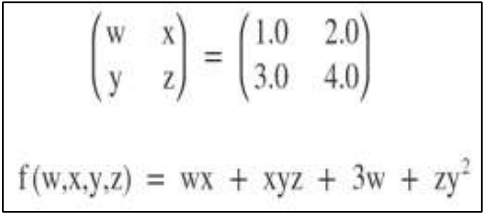

In [1]:
import numpy as np

def numerical_derivative(f, x): # 수치미분 이터레이터 version
		delta_x = 1e-4
		grad = np.zeros_like(x)
		it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])

		while not it.finished:
				idx = it.multi_index

				tmp_val = x[idx]
				x[idx] = float(tmp_val) + delta_x
				fx1 = f(x) # f(x+delta_x)

				x[idx] = float(tmp_val) - delta_x
				fx2 = f(x) # f(x-delta_x)
				grad[idx] = (fx1 - fx2) / (2*delta_x)

				x[idx] = tmp_val
				it.iternext()
		return grad

# 입력변수 4 개인 함수
# f(w,x,y,z) = wx + xyz + 3w + zy^2
# input_data 는 행렬
def func(input_data):
		w = input_data[0, 0]
		x = input_data[0, 1]
		y = input_data[1, 0]
		z = input_data[1, 1]
		return ( w*x + x*y*z + 3*w + z*np.power(y,2) )

# lambda function 정의
f = lambda W : func(W)

# 입력을 2X2 행렬로 구성함
input_data = np.array([ [1.0, 2.0], [3.0, 4.0] ])

ret = numerical_derivative( f, input_data )

print(ret)

[[ 5. 13.]
 [32. 15.]]


#[문제 5] 
####1변수 함수 $f(x) = x^2$ 에서 미분하고자 하는 입력값을 정수 3 으로 주는 경우의 미분값과 실수 3.0으로 주는 경우 미분값이 다른 이유를 설명하시오. 즉, $f'(3)$ 과 $f'(3.0)$ 을 계산하는 수치미분 코드를 구현하고 각 결과값이 나온 이유를 설명하시오 (이터레이터를 이용한 수치미분 코드를 이용하여 구현하시오)

In [10]:
import numpy as np

def numerical_derivative(f, x): # 수치미분 이터레이터 version
		delta_x = 1e-4
		grad = np.zeros_like(x)
		print("debug 1. initial input variable =", x)
		print("debug 2. initial grad =", grad)
		print("=======================================")

		it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])

		while not it.finished:
				idx = it.multi_index

				print("debug 3. idx = ", idx, ", x[idx] = ", x[idx])

				tmp_val = x[idx]
				x[idx] = float(tmp_val) + delta_x
				fx1 = f(x) # f(x+delta_x)

				x[idx] = float(tmp_val) - delta_x
				fx2 = f(x) # f(x-delta_x)
				grad[idx] = (fx1 - fx2) / (2*delta_x)
    
				print("debug 4. grad[idx] = ", grad[idx])
				print("debug 5. grad = ", grad)
				print("=======================================")

				x[idx] = tmp_val
				it.iternext()
		return grad

In [11]:
# 입력변수 1 개인 함수 f(x) = x**2
def func1(W):
	x = W[0]
	return x**2

f = lambda W : func1(W)

# 실수가 아닌 정수값 3을 입력하는 경우 예제
W = np.array([3])

# x = 3 에서의 편미분 값
numerical_derivative( f, W )

debug 1. initial input variable = [3]
debug 2. initial grad = [0]
debug 3. idx =  (0,) , x[idx] =  3
debug 4. grad[idx] =  25000
debug 5. grad =  [25000]


array([25000])

In [12]:
# 입력변수 1 개인 함수 f(x) = x**2
def func1(W):
		x = W[0]
		return x**2

f = lambda W : func1(W)

# 실수값 3.0을 입력하는 경우 예제
W = np.array([3.0])

# x = 3.0 에서의 편미분 값
numerical_derivative( f, W )

debug 1. initial input variable = [3.]
debug 2. initial grad = [0.]
debug 3. idx =  (0,) , x[idx] =  3.0
debug 4. grad[idx] =  6.000000000012662
debug 5. grad =  [6.]


array([6.])